In [1]:
import sys                              # Printing to file
import numpy                            # For shape of images
from PIL import Image, ImageDraw        # Image processing

from IPython.display import display     # For displaying the images in this notebook

## Load a PNG using PIL

Image size: (290, 290)
Image shape: (290, 290, 3)


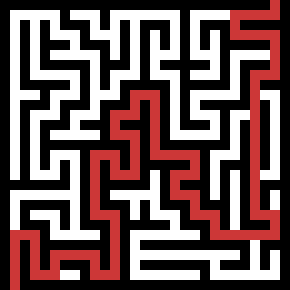

In [2]:
image = Image.open("m141410.png")
print("Image size:", image.size)

# Remove the alpha channel from a PNG
image = image.convert("RGB")
image = image.rotate(90)

print("Image shape:", numpy.array(image).shape)
image

In [3]:
pixels = list(image.getdata())
width, height = image.size
pixels = [pixels[i * width:(i + 1) * width] for i in range(height)]

rows = 29
cols = 29
block = height / rows

print("Rows:", rows)
print("Cols:", cols)
print("Block width:", block)

Rows: 29
Cols: 29
Block width: 10.0


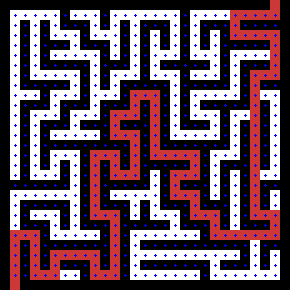

In [8]:
# Sampling points
boxedImage = image.copy()
draw = ImageDraw.Draw(boxedImage)


for r in range(1, rows - 1):
    for c in range(1, cols - 1):
        rowPixel = int((r + 0.5) * block)
        colPixel = int((c + 0.5) * block)
        
        draw.ellipse((rowPixel - 1, colPixel - 1, rowPixel + 1, colPixel + 1), fill=(0, 0, 255))

boxedImage

In [9]:
# Pixel representation
for r in range(1, rows - 1):
    for c in range(1, cols - 1):
        rowPixel = int((r + 0.5) * block)
        colPixel = int((c + 0.5) * block)
        
        pixel = pixels[rowPixel][colPixel]
        val = int(pixel[2])
        isBlack = 1 if val < 50 else 0


        if isBlack == 1:
            print("# ", end="")
        else:
            print(". ", end="")
    print()


. . . . . # . . . # . . . . . . . # . . . . . . . . . 
. # . # . # # # . # . # . # # # . # . # # # . # # # # 
. # . # . . . # . . . # . # . # . # . # . # . . . . . 
. # . # # # . # # # . # . # . # . # . # . # # # # # . 
. # . # . . . . . # . # . # . . . # . . . # . . . . . 
. # . # # # # # . # # # . # . # # # # # . # . # # # . 
. # . . . . . # . # . . . # . . . # . . . # . # . . . 
. # # # # # . # . # . # # # # # . # # # # # . # . # # 
. . . # . . . # . . . # . . . # . # . . . . . # . . . 
. # # # . # # # . # # # . # . # . # . # # # # # . # . 
. # . . . # . . . # . . . # . # . # . . . # . . . # . 
. # . # # # . # # # . # # # . # . # # # . # . # . # . 
. # . # . . . . . # . . . # . # . . . . . # . # . # . 
. # . # # # # # # # # # . # . # # # # # # # . # . # . 
. # . # . . . # . . . # . # . . . . . # . . . # . # . 
. # . # . # . # . # . # . # # # # # . # . # # # . # . 
. # . . . # . # . # . . . # . # . . . # . # . # . . . 
# # # # # # . # . # # # # # . # . # # # . # . # . # # 
. . . . . 

In [12]:
# Generate blocks file
original = sys.stdout

with open("blocks.txt", "w") as file:
    sys.stdout = file
    
    for r in range(1, rows - 1):
        for c in range(1, cols - 1):
            rowPixel = int((r + 0.5) * block)
            colPixel = int((c + 0.5) * block)
        
            pixel = pixels[rowPixel][colPixel]
            val = int(pixel[2])
            isBlack = 1 if val < 50 else 0


            if isBlack == 1:
                print("blocks[{r}][{c}] <= 1;".format(r=r, c=c))

    sys.stdout = original

print("Done")    


Done
